In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of 
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 279s 3us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
folders = glob('Datasets/train/*')


In [12]:
x = Flatten()(resnet.output)

In [13]:
len(folders)

4

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [22]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 222s 4s/step - loss: 0.8895 - accuracy: 0.6679 - val_loss: 0.9794 - val_accuracy: 0.6667
Epoch 2/10
61/61 [==============================] - 206s 3s/step - loss: 0.8167 - accuracy: 0.6858 - val_loss: 0.5808 - val_accuracy: 0.7778
Epoch 3/10
61/61 [==============================] - 195s 3s/step - loss: 0.8971 - accuracy: 0.6581 - val_loss: 0.7915 - val_accuracy: 0.7222
Epoch 4/10
61/61 [==============================] - 198s 3s/step - loss: 0.8877 - accuracy: 0.6668 - val_loss: 1.0842 - val_accuracy: 0.6667
Epoch 5/10
61/61 [==============================] - 216s 4s/step - loss: 0.8598 - accuracy: 0.6899 - val_loss: 0.8695 - val_accuracy: 0.6667
Epoch 6/10
61/61 [==============================] - 235s 4s/step - loss: 0.9535 - accuracy: 0.6750 - val_loss: 1.1364 - val_accuracy: 0.7222
Epoch 7/10
61/61 [==============================] - 229s 4s/step - loss: 0.8008 - accuracy: 0.6961 - val_loss: 2.5179 - val_accuracy: 0.6667
Epoch 8/10
61

In [23]:
import matplotlib.pyplot as plt

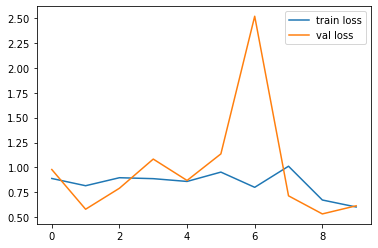

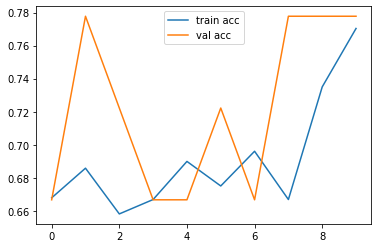

<Figure size 432x288 with 0 Axes>

In [24]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\Chandra Mouli\Anaconda3\envs\DLprojects\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.3283897e-03, 1.5063816e-03, 9.8199666e-01, 1.5168568e-02],
       [1.0583771e-02, 6.4826231e-03, 9.1348177e-01, 6.9451824e-02],
       [1.1145304e-03, 8.9793003e-01, 1.0891309e-02, 9.0064093e-02],
       [1.5731385e-03, 6.0918137e-06, 9.9837935e-01, 4.1383897e-05],
       [9.6003832e-06, 8.7416009e-07, 9.9832529e-01, 1.6642038e-03],
       [1.0673901e-03, 6.4696759e-02, 6.8685743e-03, 9.2736727e-01],
       [9.5257262e-04, 7.8369159e-01, 4.6108471e-05, 2.1530975e-01],
       [2.6085806e-01, 4.6285158e-01, 7.0978929e-03, 2.6919249e-01],
       [4.1184644e-03, 1.5443900e-05, 2.8054954e-03, 9.9306071e-01],
       [1.1186026e-02, 4.0498460e-03, 9.7735137e-01, 7.4127042e-03],
       [2.6284976e-02, 4.3264210e-01, 5.8459626e-03, 5.3522694e-01],
       [1.0071966e-03, 9.5791781e-01, 4.5258930e-05, 4.1029729e-02],
       [7.3974644e-04, 8.0110123e-03, 4.2962795e-03, 9.8695290e-01],
       [1.7943819e-03, 6.9886768e-01, 9.8055173e-03, 2.8953245e-01],
       [1.5812177e-04, 3.2334857e-

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:

y_pred

array([2, 2, 1, 2, 2, 3, 1, 1, 3, 2, 3, 1, 3, 1, 3, 3, 0, 1], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_resnet50.h5')

In [32]:
img_data

NameError: name 'img_data' is not defined